In [2]:
import logging

import matplotlib.pyplot as plt

from ev_station_solver.constants import CONSTANTS
from ev_station_solver.loading import load_locations
from ev_station_solver.logging import get_logger
from ev_station_solver.solving.solver import Solver

logger = get_logger(__name__)

# Initial Location Generator

In [3]:
# use given starting solutions
locations = load_locations("medium").values
num_samples = 5

## Random

In [4]:
# current approach with k means
s = Solver(vehicle_locations=locations, loglevel=logging.INFO)
n_clusters = int(len(locations) * CONSTANTS["mu_charging"] / (2 * CONSTANTS["station_ub"]))
# compute number of initial locations
s.add_initial_locations(n_clusters, mode="random", seed=0)
s.add_samples(num=num_samples)

2025-01-16 22:11:14,244 - ev_station_solver.solving.solver - INFO - add_initial_locations: Added 28 random locations. Total number of locations: 28.
2025-01-16 22:11:14,250 - ev_station_solver.solving.solver - INFO - add_samples: Added 5 samples.


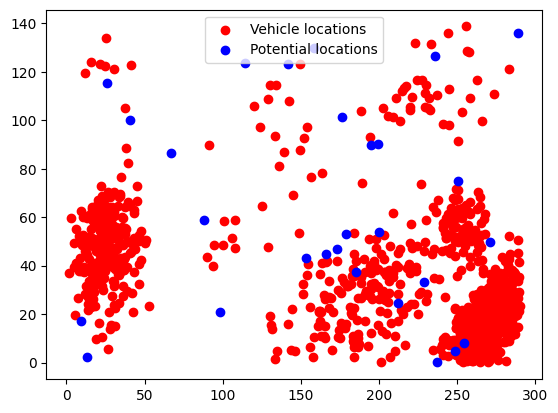

In [5]:
plt.scatter(s.vehicle_locations[:, 0], s.vehicle_locations[:, 1], c="red", label="Vehicle locations")
plt.scatter(s.coordinates_potential_cl[:, 0], s.coordinates_potential_cl[:, 1], c="blue", label="Potential locations")
plt.legend()
plt.show()

## K Means

In [6]:
# current approach with k means
s = Solver(vehicle_locations=locations, loglevel=logging.INFO)
n_clusters = int(len(locations) * CONSTANTS["mu_charging"] / (2 * CONSTANTS["station_ub"]))
# compute number of initial locations
s.add_initial_locations(n_clusters, mode="k-means", seed=0)
s.add_samples(num=num_samples)

2025-01-16 22:11:21,422 - ev_station_solver.solving.solver - INFO - add_initial_locations: Added 28 k-means locations. Total number of locations: 28.
2025-01-16 22:11:21,428 - ev_station_solver.solving.solver - INFO - add_samples: Added 5 samples.


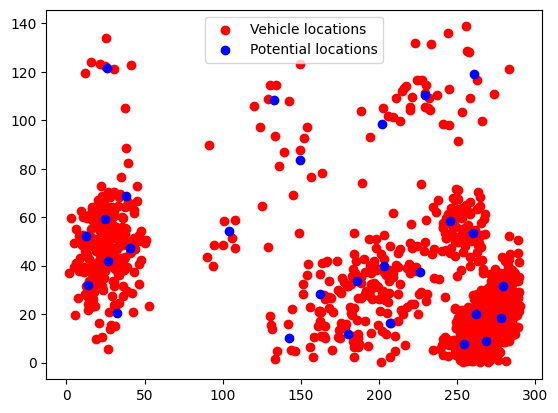

In [7]:
plt.scatter(s.vehicle_locations[:, 0], s.vehicle_locations[:, 1], c="red", label="Vehicle locations")
plt.scatter(s.coordinates_potential_cl[:, 0], s.coordinates_potential_cl[:, 1], c="blue", label="Potential locations")
plt.legend()
plt.show()

# Update Approach
Try to compute a set of initial locations based on the adjacency matrices.

Create a dataframe with the cars across the samples

In [8]:
s = Solver(vehicle_locations=locations, loglevel=logging.INFO)
s.add_samples(num=num_samples)
s.add_initial_locations(n_stations=None, mode="clique", seed=0)

2025-01-16 22:11:23,983 - ev_station_solver.solving.solver - INFO - add_samples: Added 5 samples.
2025-01-16 22:11:23,984 - ev_station_solver.solving.initial_location_generator - INFO - get_clique_locations: Computing clique locations


2025-01-16 22:12:07,593 - ev_station_solver.solving.initial_location_generator - INFO - get_clique_locations: Finished computing clique locations
2025-01-16 22:12:07,594 - ev_station_solver.solving.solver - INFO - add_initial_locations: Added 51 clique locations. Total number of locations: 51.


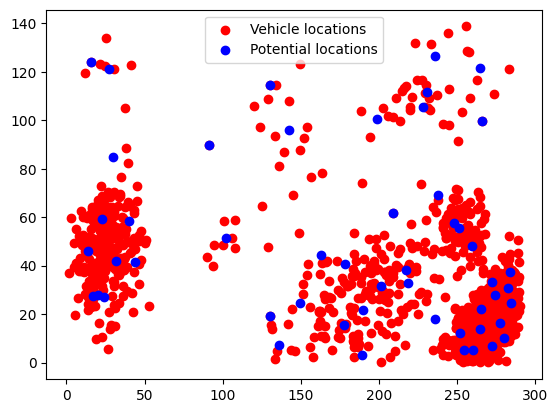

In [9]:
plt.scatter(s.vehicle_locations[:, 0], s.vehicle_locations[:, 1], c="red", label="Vehicle locations")
plt.scatter(s.coordinates_potential_cl[:, 0], s.coordinates_potential_cl[:, 1], c="blue", label="Potential locations")
plt.legend()
plt.show()